In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder

In [2]:
df = pd.read_csv(r"C:\Users\shana\Downloads\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
for i in df.columns:
    print(df[i].value_counts())

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()).astype(int)

# EDA

In [13]:
numerical_col = ['age','avg_glucose_level','bmi']
category_col = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

## Univariate Analysis

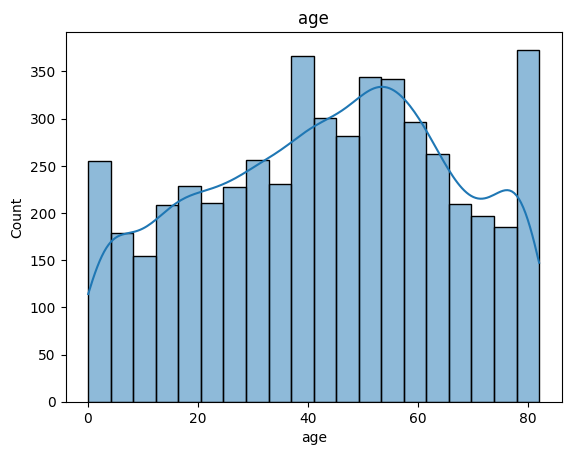

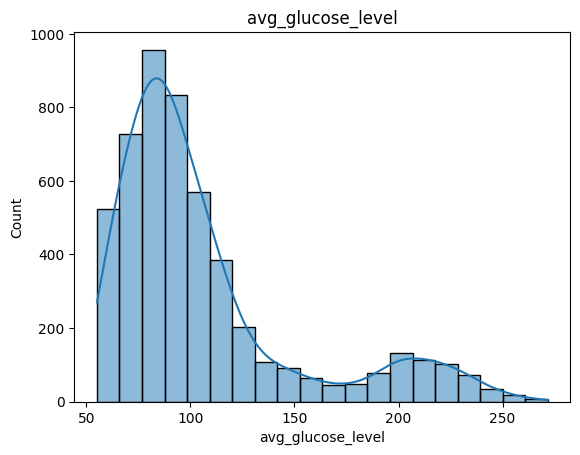

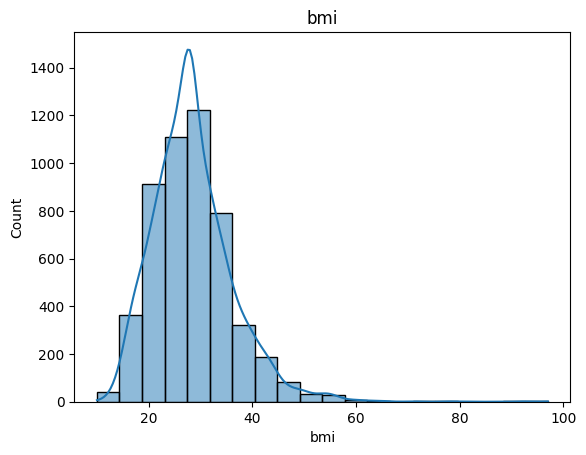

In [15]:
for i in numerical_col:
    sns.histplot(x=df[i],bins=20,kde=True)
    plt.title(i)
    plt.show()

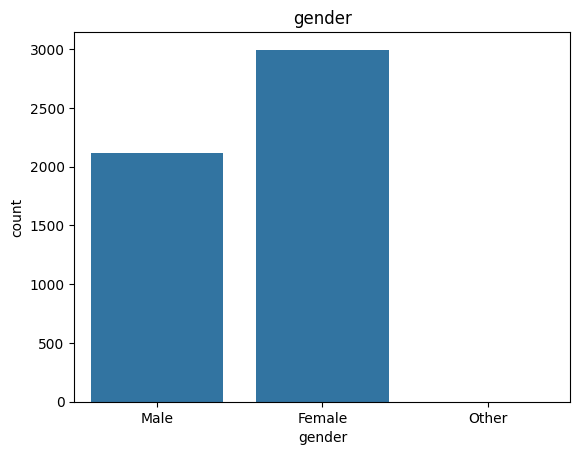

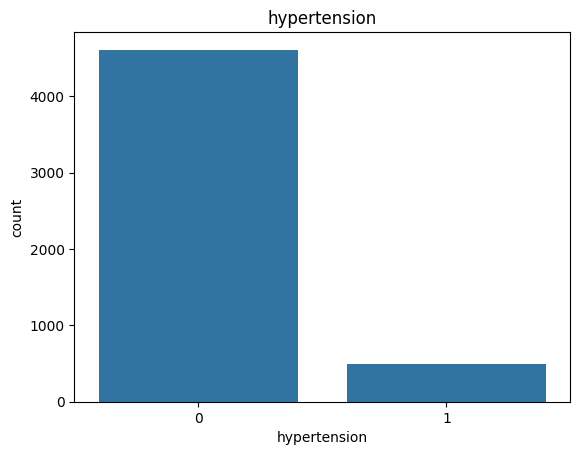

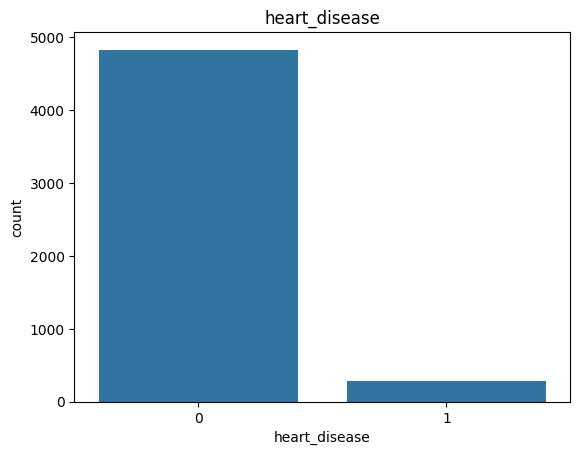

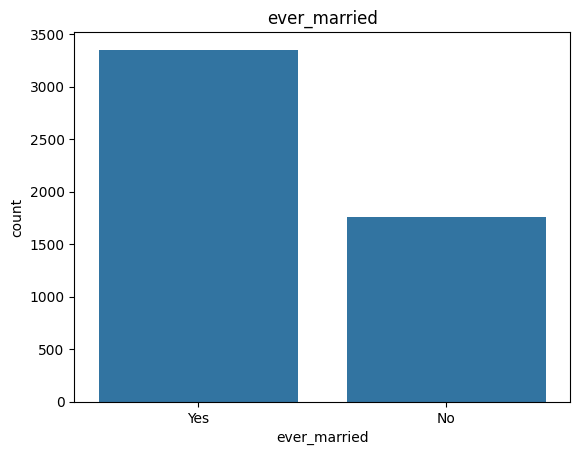

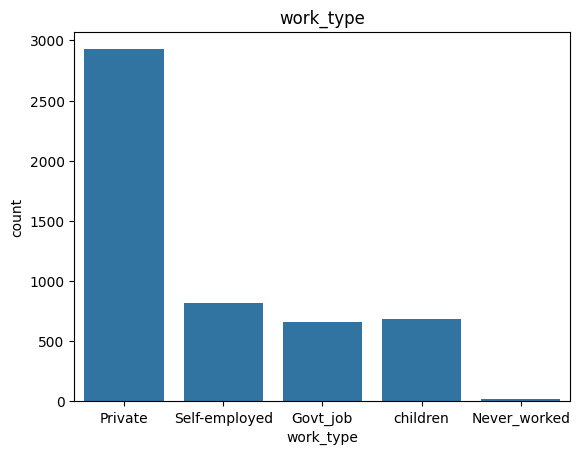

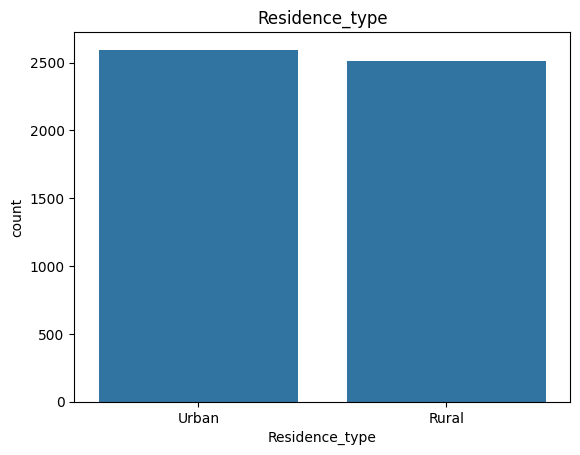

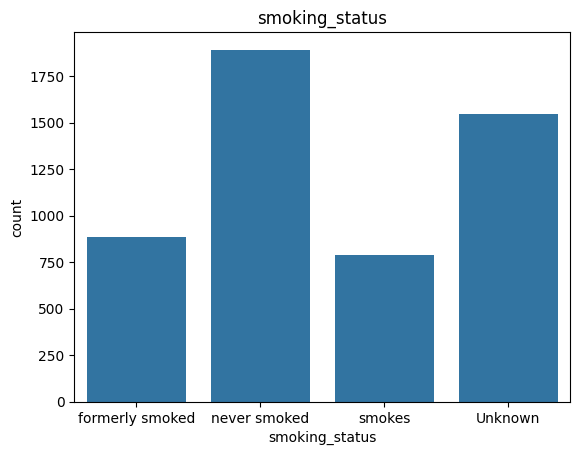

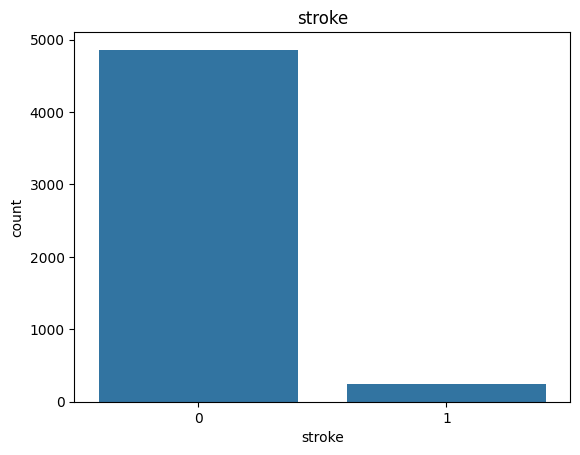

In [16]:
for i in category_col:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

## Bivariate Analysis

### Numerical v/s Categorical

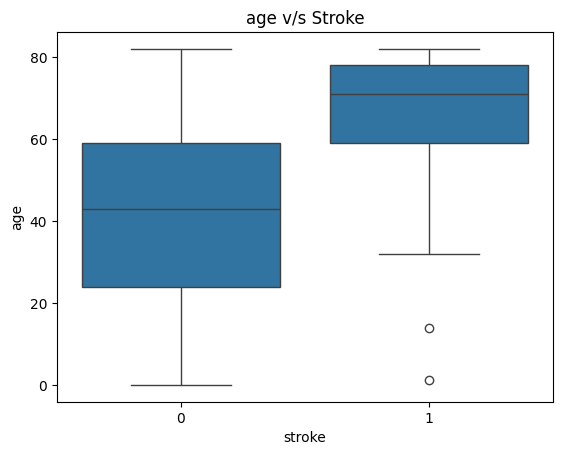

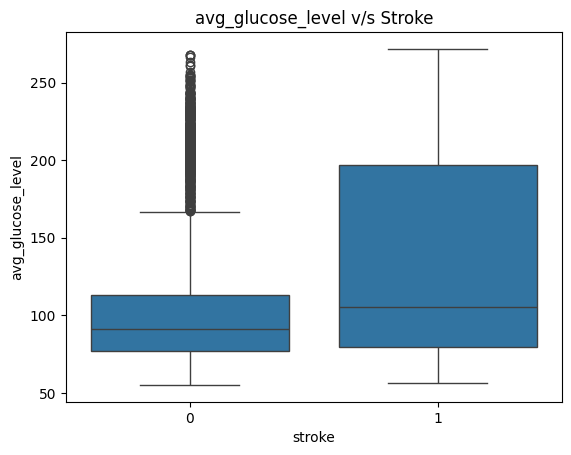

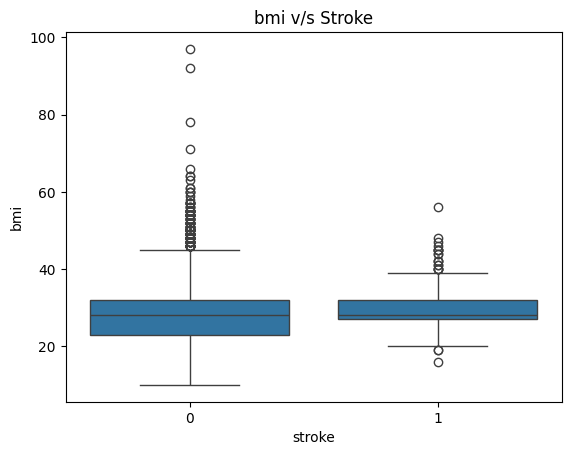

In [19]:
for i in numerical_col:
    sns.boxplot(y=df[i], x=df['stroke'])
    plt.title(f'{i} v/s Stroke')
    plt.show()

### Outlier Handling

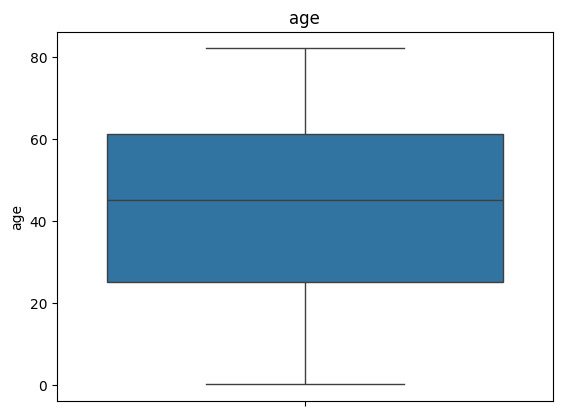

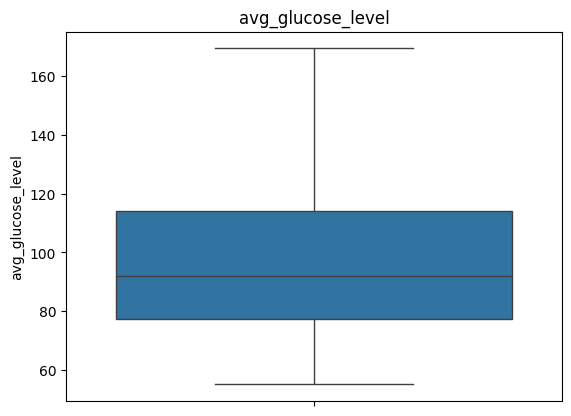

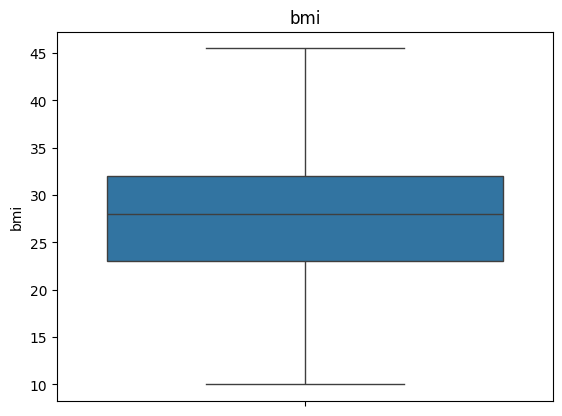

In [21]:
for i in numerical_col:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)
    IQR=q3-q1
    low_bound=q1-1.5*IQR
    upp_bound=q3+1.5*IQR
    df[i]=df[i].clip(lower=low_bound,upper=upp_bound)
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

### Categorical v/s Categorical

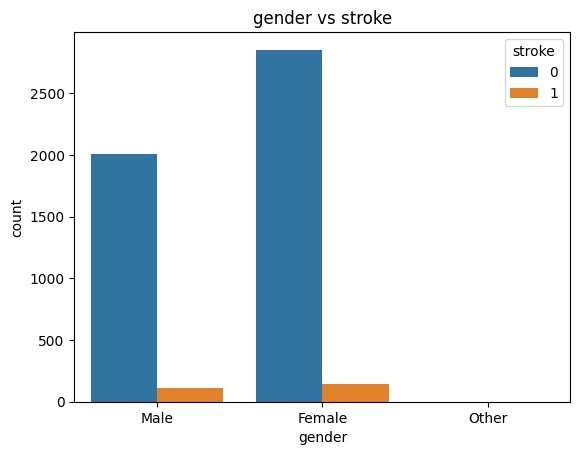

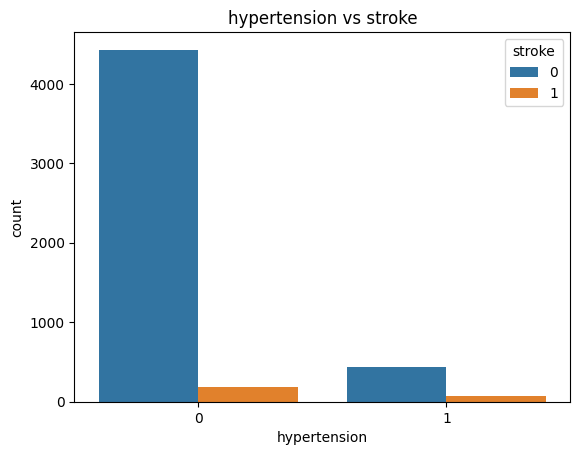

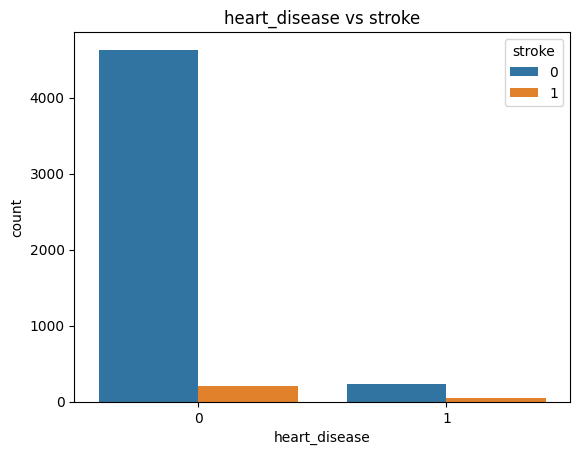

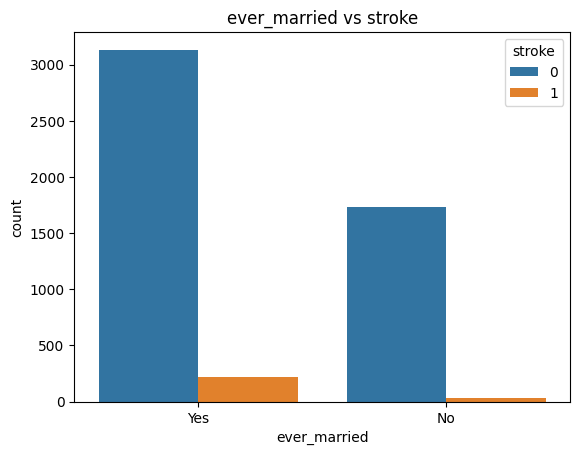

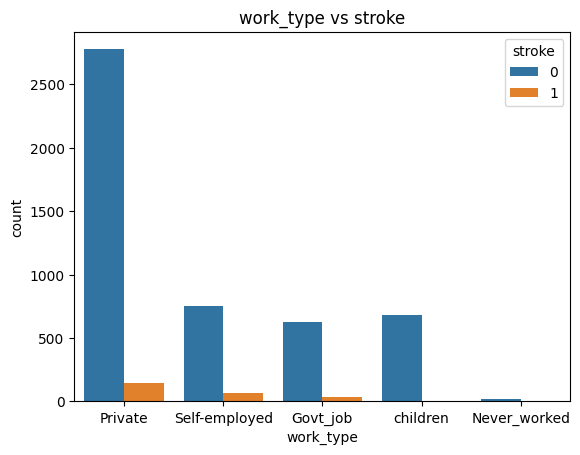

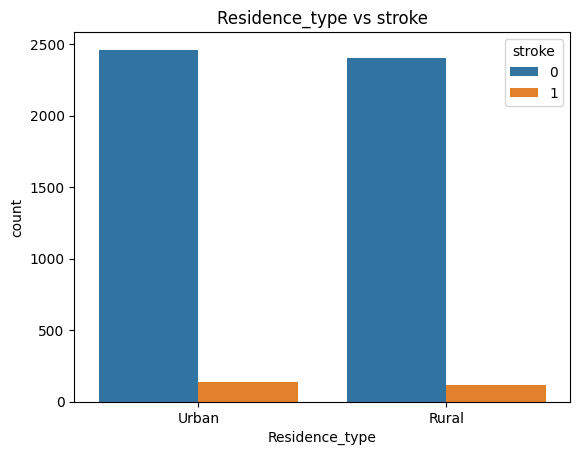

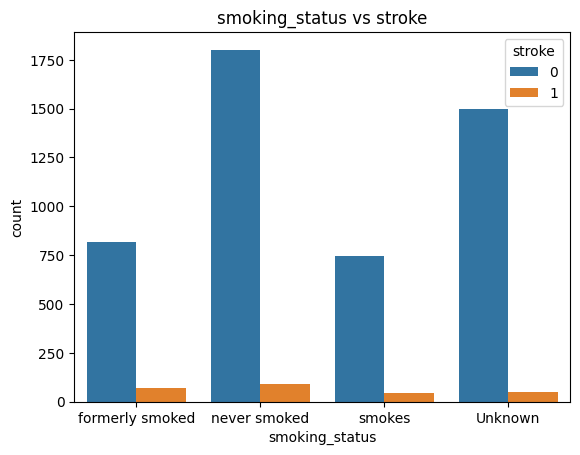

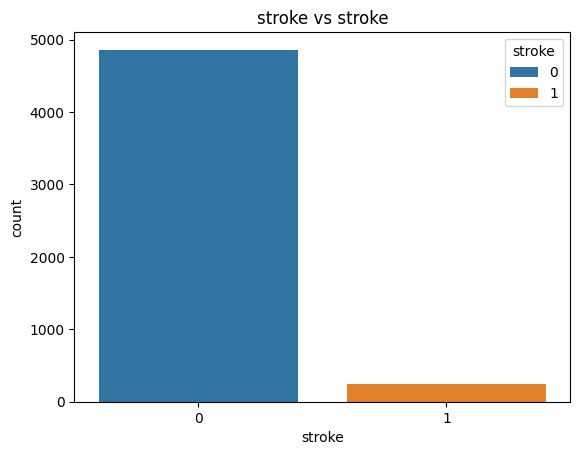

In [23]:
for i in category_col:
    sns.countplot(x=df[i],hue=df['stroke'],data=df)
    plt.title(f"{i} vs stroke")
    plt.show()

In [24]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.0,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.0,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.0,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.7500,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.0,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.0,formerly smoked,0


### LabelEncoding

In [26]:
lb = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender'])
print(lb.classes_)

['Female' 'Male' 'Other']


In [27]:
lb = LabelEncoder()
df['ever_married'] = lb.fit_transform(df['ever_married'])
print(lb.classes_)

['No' 'Yes']


In [28]:
lb = LabelEncoder()
df['work_type'] = lb.fit_transform(df['work_type'])
print(lb.classes_)

['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']


In [29]:
lb = LabelEncoder()
df['Residence_type'] = lb.fit_transform(df['Residence_type'])
print(lb.classes_)

['Rural' 'Urban']


In [30]:
lb = LabelEncoder()
df['smoking_status'] = lb.fit_transform(df['smoking_status'])
print(lb.classes_)

['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [31]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,169.3575,36.0,1,1
1,51676,0,61.0,0,0,1,3,0,169.3575,28.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.9200,32.0,2,1
3,60182,0,49.0,0,0,1,2,1,169.3575,34.0,3,1
4,1665,0,79.0,1,0,1,3,0,169.3575,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.7500,28.0,2,0
5106,44873,0,81.0,0,0,1,3,1,125.2000,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.9900,30.0,2,0
5108,37544,1,51.0,0,0,1,2,0,166.2900,25.0,1,0


In [32]:
df.drop('id',axis=1,inplace=True)

In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.0,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.0,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.0,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.0,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.0,2,0
5106,0,81.0,0,0,1,3,1,125.2000,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.9900,30.0,2,0
5108,1,51.0,0,0,1,2,0,166.2900,25.0,1,0


## Correlation Map

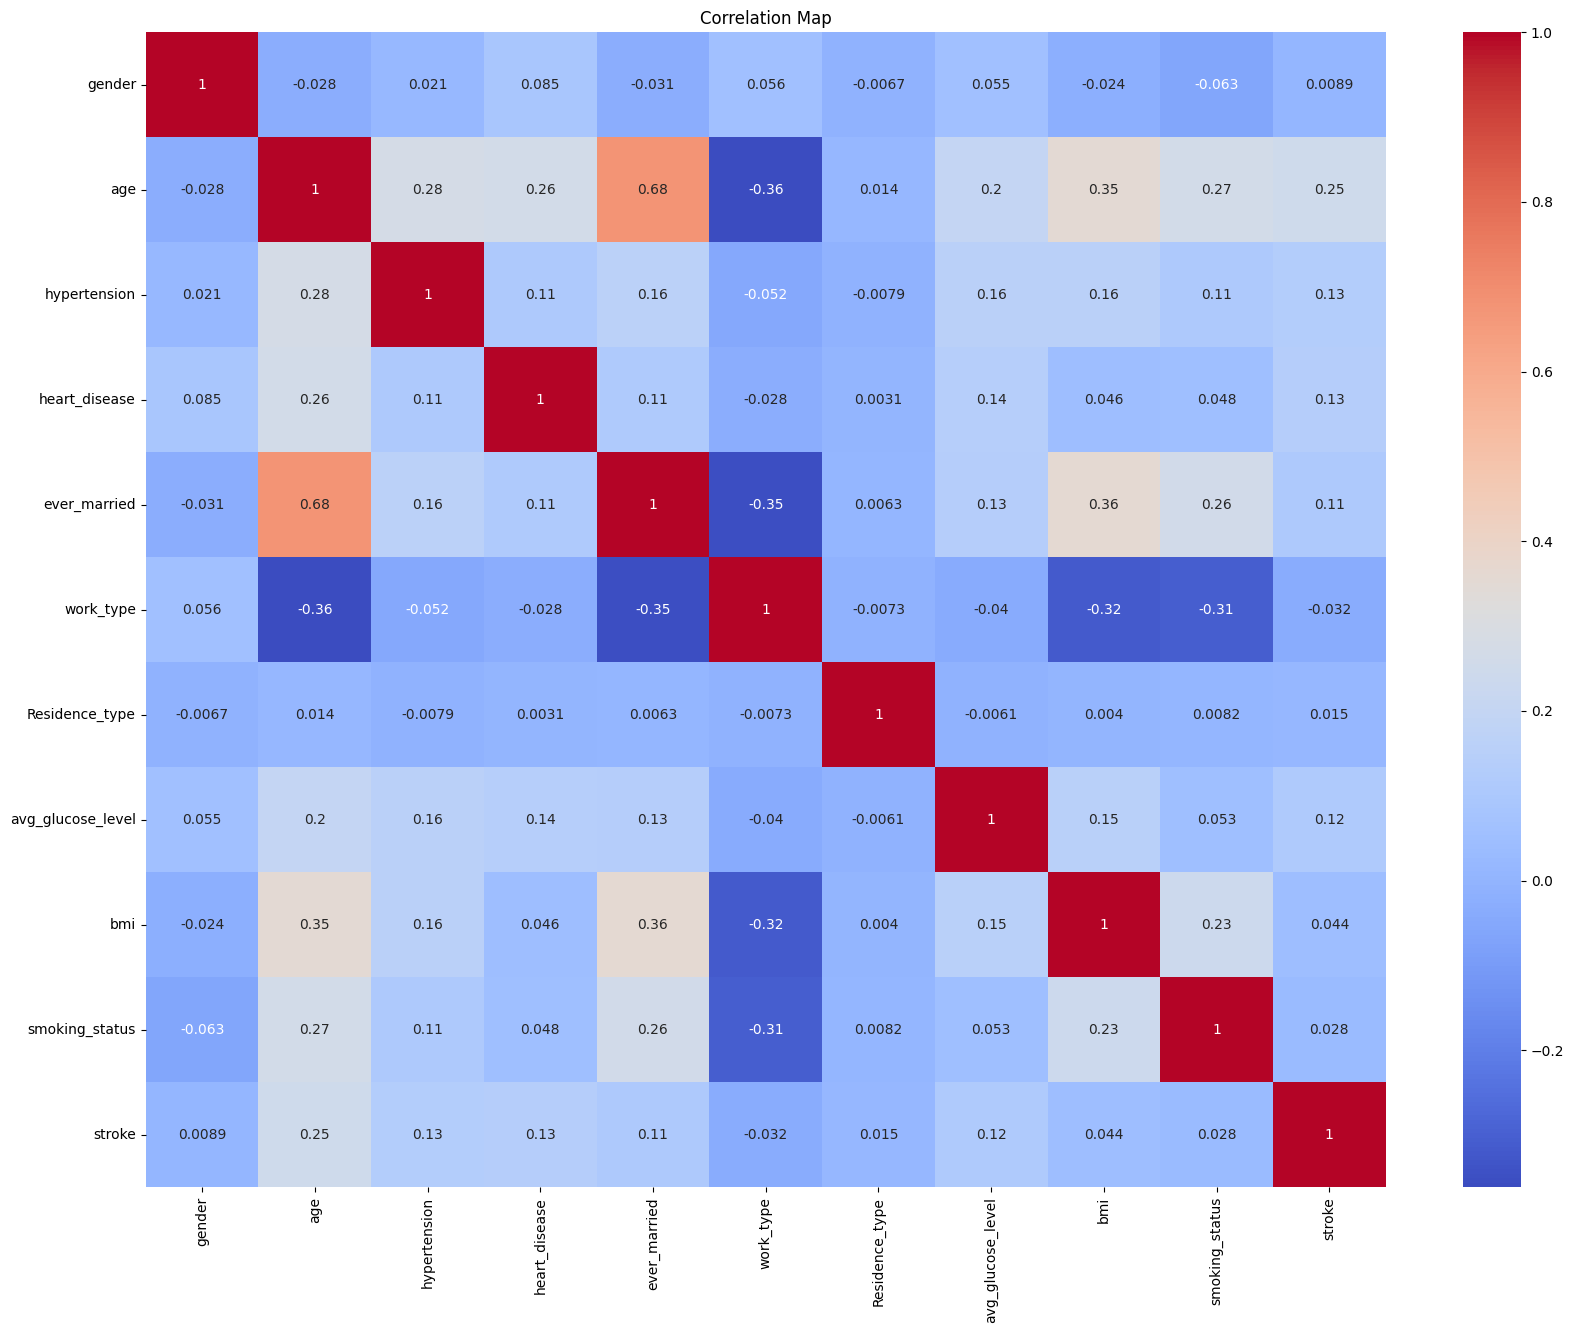

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [36]:
new_list = ['age','heart_disease','work_type','bmi','smoking_status','stroke']
df = df[new_list]
df

,age,heart_disease,work_type,bmi,smoking_status,stroke
0,67.0,1,2,36.0,1,1
1,61.0,0,3,28.0,2,1
2,80.0,1,2,32.0,2,1
3,49.0,0,2,34.0,3,1
4,79.0,0,3,24.0,2,1
...,...,...,...,...,...,...
5105,80.0,0,2,28.0,2,0
5106,81.0,0,3,40.0,2,0
5107,35.0,0,3,30.0,2,0
5108,51.0,0,2,25.0,1,0


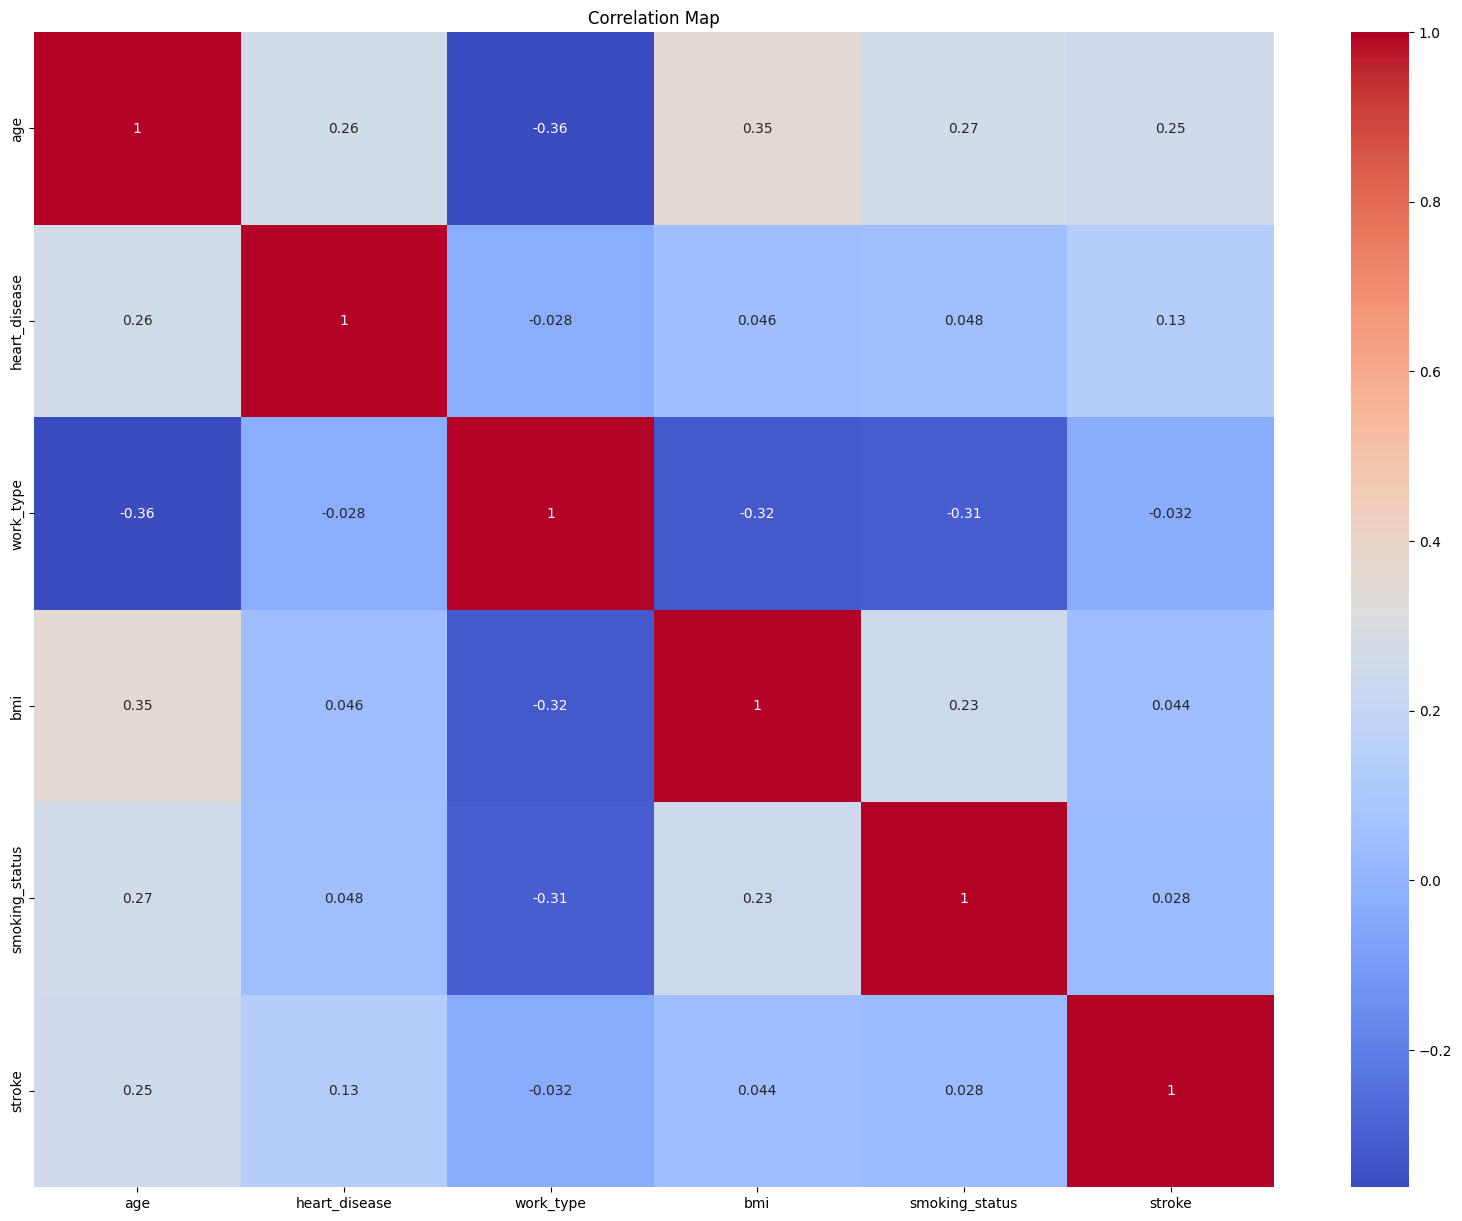

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

## Splitting data

In [39]:
x = df.drop(columns='stroke')
y = df['stroke']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_train

,age,heart_disease,work_type,bmi,smoking_status
802,79.00,0,3,28.0,1
3927,62.00,0,2,36.0,0
2337,21.00,0,2,33.0,2
3910,31.00,0,0,30.0,1
1886,31.00,0,2,19.0,2
...,...,...,...,...,...
4426,43.00,0,0,30.0,2
466,61.00,0,2,45.5,3
3092,1.16,0,4,17.0,0
3772,80.00,0,3,31.0,1


In [43]:
x_test

,age,heart_disease,work_type,bmi,smoking_status
4688,31.00,0,3,23.0,0
4478,40.00,0,3,28.0,2
3849,8.00,0,4,22.0,0
4355,79.00,0,3,19.0,2
3826,75.00,0,0,27.0,2
...,...,...,...,...,...
3605,1.88,0,4,28.0,0
4934,1.32,0,4,28.0,0
4835,49.00,0,3,30.0,1
4105,56.00,0,3,24.0,3


In [44]:
y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

In [45]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [46]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
print(Counter(y_train))

Counter({0: 3901, 1: 3901})


C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [215]:
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[['age','bmi']] = scaler.fit_transform(x_train_scaled[['age','bmi']])
x_train_scaled

,age,heart_disease,work_type,bmi,smoking_status
0,1.090661,0,3,-0.156157,1
1,0.320177,0,2,1.098967,0
2,-1.538049,0,2,0.628296,2
3,-1.084824,0,0,0.157624,1
4,-1.084824,0,2,-1.568172,2
...,...,...,...,...,...
7797,1.098582,0,3,-0.811141,2
7798,1.096338,0,2,-0.783719,1
7799,0.930892,0,2,-1.370087,0
7800,0.138886,0,2,-0.037154,3


In [218]:
x_test_scaled = x_test.copy()
x_test_scaled[['age','bmi']] = scaler.transform(x_test_scaled[['age','bmi']])
x_test_scaled

,age,heart_disease,work_type,bmi,smoking_status
4688,-1.084824,0,3,-0.940610,0
4478,-0.676920,0,3,-0.156157,2
3849,-2.127243,0,4,-1.097500,0
4355,1.090661,0,3,-1.568172,2
3826,0.909370,0,0,-0.313048,2
...,...,...,...,...,...
3605,-2.404617,0,4,-0.156157,0
4934,-2.429998,0,4,-0.156157,0
4835,-0.269017,0,3,0.157624,1
4105,0.048241,0,3,-0.783719,3


## Hyper Parameter Tuning

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def tune_classifier(model_name, x_train_scaled, y_train, x_test_scaled, y_test):
    model_dict = {
        'knn':(KNeighborsClassifier(), {
            'n_neighbors':[3,5,7,9],
            'weights':['uniform', 'distance'],
            'metric':['euclidean', 'manhattan']
        }),
        'logistic':(LogisticRegression(solver = 'liblinear'), {
            'C':[0.01, 0.1, 1, 10],
            'penalty':['l1', 'l2']
        }),
        'decision_tree':(DecisionTreeClassifier(), {
            'max_depth':[None, 10, 20, 30],
            'min_samples_split':[2, 5, 10],
            'min_samples_leaf':[1, 2, 4]
        }),
        'random_forest':(RandomForestClassifier(), {
            'n_estimators':[100, 200],
            'max_depth':[None, 10, 20],
            'min_samples_split':[2, 5]
        }),
        'ada_boost':(AdaBoostClassifier(), {
            'n_estimators':[50, 100, 200],
            'learning_rate':[0.01, 0.1, 1]
        }),
        'svm':(SVC(), {
            'C':[0.1, 1, 10],
            'kernel':['linear', 'rbf'],
            'gamma':['scale', 'auto']
        })
    }
    if model_name not in model_dict:
        print('Unsupported Classifier. Choose from :',list(model_dict.keys()))
        return

    model, param_grid = model_dict[model_name]
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train_scaled, y_train)

    print(f"\n📘 {model_name.upper()} Classifier Results:")
    print('Best Params :', grid.best_params_)
    print('Best CV Accuracy :', grid.best_score_)
    print('Test Accuracy :', accuracy_score(y_test, grid.predict(x_test_scaled)))

tune_classifier('knn', x_train_scaled, y_train, x_test_scaled, y_test)
tune_classifier('logistic', x_train_scaled, y_train, x_test_scaled, y_test)
tune_classifier('decision_tree', x_train_scaled, y_train, x_test_scaled, y_test)
tune_classifier('random_forest', x_train_scaled, y_train, x_test_scaled, y_test)
tune_classifier('ada_boost', x_train_scaled, y_train, x_test_scaled, y_test)
tune_classifier('svm', x_train_scaled, y_train, x_test_scaled, y_test)


📘 KNN Classifier Results:
Best Params : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV Accuracy : 0.9083583008919331
Test Accuracy : 0.8532289628180039

📘 LOGISTIC Classifier Results:
Best Params : {'C': 0.01, 'penalty': 'l1'}
Best CV Accuracy : 0.7658311568849686
Test Accuracy : 0.7367906066536204

📘 DECISION_TREE Classifier Results:
Best Params : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy : 0.9259194467714646
Test Accuracy : 0.8884540117416829

📘 RANDOM_FOREST Classifier Results:
Best Params : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy : 0.9416843246439658
Test Accuracy : 0.9090019569471625

📘 ADA_BOOST Classifier Results:
Best Params : {'learning_rate': 1, 'n_estimators': 200}
Best CV Accuracy : 0.8072316398101151
Test Accuracy : 0.7465753424657534

📘 SVM Classifier Results:
Best Params : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Accuracy : 0.8183824471492633
Test Acc

# Model Building

## K Neighbor Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.score(x_train_scaled,y_train)

0.9450140989489875

In [58]:
knn.score(x_test_scaled,y_test)

0.8326810176125244

In [59]:
y_pred_knn = knn.predict(x_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
result_knn = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_knn})
result_knn

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,1
...,...,...
3605,0,1
4934,0,0
4835,0,0
4105,0,0


## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
line_model = LogisticRegression()

In [64]:
line_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [65]:
line_model.score(x_train_scaled,y_train)

0.7626249679569341

In [66]:
line_model.score(x_test_scaled,y_test)

0.7299412915851272

In [67]:
y_pred_model = line_model.predict(x_test)
y_pred_model

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
result_model = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_model})
result_model

,Actual,Predicted
4688,0,1
4478,0,1
3849,0,1
4355,0,1
3826,0,1
...,...,...
3605,0,1
4934,0,1
4835,0,1
4105,0,1


## Naive Bayes 

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
naive_model = GaussianNB()

In [72]:
naive_model.fit(x_train_scaled,y_train)

GaussianNB()

In [73]:
naive_model.score(x_train_scaled,y_train)

0.7671109971802103

In [74]:
naive_model.score(x_test_scaled,y_test)

0.6839530332681018

In [75]:
y_pred_naive = naive_model.predict(x_test_scaled)
y_pred_naive

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [76]:
result_naive = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_naive})
result_naive

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,1
...,...,...
3605,0,0
4934,0,0
4835,0,0
4105,0,0


## Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
tree_model = DecisionTreeClassifier()

In [80]:
tree_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [81]:
tree_model.score(x_train_scaled,y_train)

0.9938477313509356

In [82]:
tree_model.score(x_test_scaled,y_test)

0.8864970645792564

In [83]:
y_pred_tree = tree_model.predict(x_test_scaled)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
result_tree = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_tree})
result_tree

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,0
...,...,...
3605,0,0
4934,0,1
4835,0,0
4105,0,0


## Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
random_model = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)

In [88]:
random_model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [89]:
random_model.score(x_train_scaled,y_train)

0.9937195590874135

In [90]:
random_model.score(x_test_scaled,y_test)

0.9001956947162426

In [91]:
y_pred_random = random_model.predict(x_test_scaled)
y_pred_random

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
result_random = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_random})
result_random

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,0
...,...,...
3605,0,0
4934,0,0
4835,0,0
4105,0,0


## ADA Boost Classifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),n_estimators=50,learning_rate=1.0,random_state=42)

In [96]:
ada.fit(x_train_scaled,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)

In [97]:
ada.score(x_train_scaled,y_train)

0.8223532427582672

In [98]:
ada.score(x_test_scaled,y_test)

0.776908023483366

In [99]:
y_pred_ada = ada.predict(x_test_scaled)

In [100]:
result_ada = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ada})
result_ada

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,1
...,...,...
3605,0,0
4934,0,0
4835,0,1
4105,0,0


## SVM Support Vector Machine

In [102]:
from sklearn.svm import SVC

In [103]:
svc = SVC(kernel='rbf',C=500)

In [104]:
svc.fit(x_train_scaled,y_train)

SVC(C=500)

In [105]:
svc.score(x_train_scaled,y_train)

0.8332478851576519

In [106]:
svc.score(x_test_scaled,y_test)

0.7211350293542075

In [107]:
y_pred_svc = svc.predict(x_test_scaled)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
result_svc = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_svc})
result_svc

,Actual,Predicted
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,1
...,...,...
3605,0,0
4934,0,0
4835,0,0
4105,0,0


### validations

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification(y_true, y_pred):
    print("Classification Metrics:")
    print("-----------------------")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


# Evaluate
evaluate_classification(y_test, y_pred_svc)


Classification Metrics:
-----------------------
Accuracy       : 0.7211
Precision      : 0.9200
Recall         : 0.7211
F1 Score       : 0.7933

Confusion Matrix:
[[696 264]
 [ 21  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       960
           1       0.13      0.66      0.22        62

    accuracy                           0.72      1022
   macro avg       0.55      0.69      0.53      1022
weighted avg       0.92      0.72      0.79      1022



In [111]:
evaluate_classification(y_test, y_pred_ada)

Classification Metrics:
-----------------------
Accuracy       : 0.7769
Precision      : 0.9226
Recall         : 0.7769
F1 Score       : 0.8317

Confusion Matrix:
[[754 206]
 [ 22  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.16      0.65      0.26        62

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.56      1022
weighted avg       0.92      0.78      0.83      1022



In [112]:
evaluate_classification(y_test, y_pred_knn)

Classification Metrics:
-----------------------
Accuracy       : 0.8327
Precision      : 0.9023
Recall         : 0.8327
F1 Score       : 0.8632

Confusion Matrix:
[[831 129]
 [ 42  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       960
           1       0.13      0.32      0.19        62

    accuracy                           0.83      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.90      0.83      0.86      1022



In [113]:
evaluate_classification(y_test, y_pred_model)

Classification Metrics:
-----------------------
Accuracy       : 0.0607
Precision      : 0.0037
Recall         : 0.0607
F1 Score       : 0.0069

Confusion Matrix:
[[  0 960]
 [  0  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.06      1.00      0.11        62

    accuracy                           0.06      1022
   macro avg       0.03      0.50      0.06      1022
weighted avg       0.00      0.06      0.01      1022



C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [114]:
evaluate_classification(y_test, y_pred_tree)

Classification Metrics:
-----------------------
Accuracy       : 0.8865
Precision      : 0.9017
Recall         : 0.8865
F1 Score       : 0.8938

Confusion Matrix:
[[892  68]
 [ 48  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.17      0.23      0.19        62

    accuracy                           0.89      1022
   macro avg       0.56      0.58      0.57      1022
weighted avg       0.90      0.89      0.89      1022



In [115]:
evaluate_classification(y_test, y_pred_naive)

Classification Metrics:
-----------------------
Accuracy       : 0.6840
Precision      : 0.9352
Recall         : 0.6840
F1 Score       : 0.7665

Confusion Matrix:
[[646 314]
 [  9  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       960
           1       0.14      0.85      0.25        62

    accuracy                           0.68      1022
   macro avg       0.57      0.76      0.52      1022
weighted avg       0.94      0.68      0.77      1022



In [116]:
evaluate_classification(y_test, y_pred_random)

Classification Metrics:
-----------------------
Accuracy       : 0.9002
Precision      : 0.9046
Recall         : 0.9002
F1 Score       : 0.9023

Confusion Matrix:
[[906  54]
 [ 48  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       960
           1       0.21      0.23      0.22        62

    accuracy                           0.90      1022
   macro avg       0.58      0.58      0.58      1022
weighted avg       0.90      0.90      0.90      1022

